# 악플 분류기 - 이진분류

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [76]:
# 데이터 불러오기
train_df = pd.read_csv("./data/unsmile_train_v1.0.tsv",delimiter='\t')
test_df = pd.read_csv("./data/unsmile_valid_v1.0.tsv", delimiter='\t')

In [77]:
print(train_df.shape, test_df.shape)
train_df.head(3)

(15005, 12) (3737, 12)


,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0


## 데이터 전처리

- train dataset

In [78]:
# Null 값 체크
train_df.isna().sum().sum()

0

In [79]:
# 중복 데이터 확인
train_df.shape, train_df.문장.nunique()

((15005, 12), 15004)

In [80]:
# 중복 데이터 제거
train_df.drop_duplicates(subset=['문장'], inplace=True)
train_df.shape

(15004, 12)

In [81]:
# 분류가 안되어 있는 데이터 확인
train_df[train_df.sum(axis=1) == 0]

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
5876,혹시 돼지한명이랑 멸치 두명 무리 아니노 ㅋ 노천탕에서 자주봄 거기 사장들 달로 끊...,0,0,0,0,0,0,0,0,0,0,0
11942,누가 대통령이 지나가다가 여자 하나 성폭행했다고 고발해도 안했다는 증거 없으니 잡아...,0,0,0,0,0,0,0,0,0,0,0


In [82]:
# 분류 안되어 있는 데이터 삭제
train_df = train_df[train_df.sum(axis=1) != 0]

- test dataset

In [83]:
# Null 값 체크
test_df.isna().sum().sum()

0

In [84]:
# 중복 데이터 확인
test_df.shape, test_df.문장.nunique()

((3737, 12), 3737)

In [85]:
# 분류가 안되어 있는 데이터 확인
test_df[test_df.sum(axis=1) == 0]

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭


## 텍스트 전처리

- train data

In [86]:
# 한글 이외의 문자는 공백으로 처리하고 strip
train_df.문장 = train_df.문장.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ').str.strip()
train_df.문장.replace('', np.nan, inplace=True)
print(train_df.문장.isna().sum())
train_df.dropna(how='any', inplace=True)
train_df.reset_index(drop=True, inplace=True)
train_df.shape

24


(14978, 12)

- test data

In [87]:
# 한글 이외의 문자는 공백으로 처리하고 strip
test_df.문장 = test_df.문장.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ').str.strip()
test_df.문장.replace('', np.nan, inplace=True)
print(test_df.문장.isna().sum())
test_df.dropna(how='any', inplace=True)
test_df.reset_index(drop=True, inplace=True)
test_df.shape

7


(3730, 12)

- 데이터 분포

In [88]:
train_df.sum()[1:]

여성/가족    1599
남성       1347
성소수자     1140
인종/국적    1727
연령        603
지역       1052
종교       1181
기타 혐오     569
악플/욕설    3141
clean    3718
개인지칭      315
dtype: object

In [89]:
test_df.sum()[1:]

여성/가족    393
남성       334
성소수자     280
인종/국적    426
연령       146
지역       260
종교       290
기타 혐오    134
악플/욕설    785
clean    930
개인지칭      74
dtype: object

## 데이터 전처리
- 레이블링
  - clean인 문장은 1
  - clean이 아닌 문장은 0

In [19]:
binary_train = train_df.copy()
binary_test = test_df.copy()

In [20]:
binary_train.loc[binary_train[binary_train.clean == 1].index, '라벨'] = 1
binary_train.loc[binary_train[binary_train.clean != 1].index, '라벨'] = 0

binary_test.loc[binary_test[binary_test.clean == 1].index, '라벨'] = 1
binary_test.loc[binary_test[binary_test.clean != 1].index, '라벨'] = 0

In [21]:
binary_train = binary_train[['문장', '라벨']]
binary_test = binary_test[['문장', '라벨']]

In [22]:
#데이터 읽어오기
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
df = pd.read_csv(url, header=None)
data = df.values
X, y = data[:, :-1], data[:, -1]

In [23]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

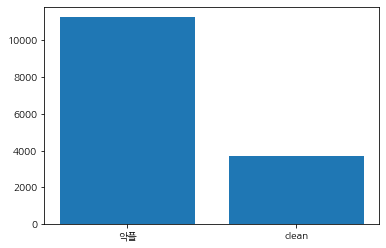

In [24]:
plt.bar([0, 1], binary_train['라벨'].value_counts())
plt.xticks([0, 1], ['악플', 'clean'])
plt.show()

In [25]:
# 오버샘플링
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler(random_state=0).fit_resample(binary_train['문장'].values.reshape(-1, 1), binary_train['라벨'].values.reshape(-1, 1))

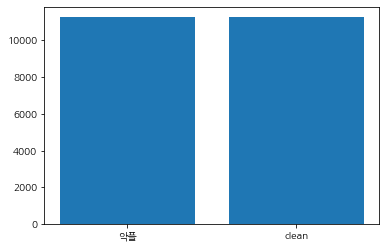

In [26]:
from collections import Counter
counter = Counter(y_resampled)
plt.bar(counter.keys(), counter.values())
plt.xticks([0, 1], ['악플', 'clean'])
plt.show()

## 형태소 분석

In [27]:
from konlpy.tag import Mecab
from tqdm.notebook import tqdm

In [28]:
mecab = Mecab("C:/mecab/mecab-ko-dic")
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','을','ㅋㅋ','ㅠㅠ','ㅎㅎ']

In [29]:
bineary_train_data = []
for sentence in tqdm(X_resampled):
  morphs = mecab.morphs(sentence[0])
  tmp_X = [word for word in morphs if word not in stopwords]
  bineary_train_data.append(tmp_X)

  0%|          | 0/22520 [00:00<?, ?it/s]

In [30]:
bineary_test_data = []
for sentence in tqdm(binary_test.문장):
  morphs = mecab.morphs(sentence)
  tmp_X = [word for word in morphs if word not in stopwords]
  bineary_test_data.append(tmp_X)

  0%|          | 0/3730 [00:00<?, ?it/s]

## 토큰화

In [31]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(bineary_train_data)

In [33]:
# 등장 빈도가 3 미만인 것의 갯수
threshold = 5
total_cnt = len(t.word_index)   # 단어의 수
rare_cnt = 0                    # 등장 빈도가 threshold 보다 작은 단어의 갯수
total_freq = 0                  # 훈련 데이터의 전체 단어의 빈도수의 합
rare_freq = 0                   # 등장 빈도가 threshold 보다 작은 단어의 등장 빈도수의 합

In [34]:
for key, value in t.word_counts.items():
    total_freq += value
    if value < threshold:
        rare_cnt += 1
        rare_freq += value

In [35]:
print('단어 집합(vocabulary)의 크기 :', total_cnt)
print(f'등장 빈도가 {threshold - 1}번 이하인 희귀 단어의 수: {rare_cnt}')
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 19677
등장 빈도가 4번 이하인 희귀 단어의 수: 13394
단어 집합에서 희귀 단어의 비율: 68.06931951008792
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.038851826214176


In [36]:
# 모든 단어 사용
vocab_size = total_cnt + 2
vocab_size

19679

In [47]:
t = Tokenizer(num_words=vocab_size, oov_token='OOV')
t.fit_on_texts(bineary_train_data)
X_train = t.texts_to_sequences(bineary_train_data)
X_test = t.texts_to_sequences(bineary_test_data)

In [48]:
# 데이터의 최대/평균 길이
max(len(s) for s in X_train), sum(map(len, X_train)) / len(X_train)

(74, 14.690097690941386)

In [49]:
# 악플 길이를 60으로 설정
max_len = 60

In [50]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

X_train.shape, X_test.shape

((22520, 60), (3730, 60))

In [60]:
y_train = y_resampled
y_test = binary_test['라벨'].values
y_train.shape, y_test.shape

((22520,), (3730,))

## 모델 정의/설정/학습

In [62]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, GlobalMaxPooling1D, Dropout, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### 1. CNN

In [63]:
model1 = Sequential([ 
    Embedding(vocab_size, 128, input_length=max_len),
    Conv1D(64, 5, padding='valid', activation='relu', strides=1),
    Dropout(0.5),
    Conv1D(32, 5, padding='valid', activation='relu', strides=1),
    Dropout(0.5),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 128)           2518912   
_________________________________________________________________
conv1d (Conv1D)              (None, 56, 64)            41024     
_________________________________________________________________
dropout (Dropout)            (None, 56, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 52, 32)            10272     
_________________________________________________________________
dropout_1 (Dropout)          (None, 52, 32)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

In [72]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1_path = 'best-cnn.h5py'
mc1 = ModelCheckpoint(model1_path, verbose=1, save_best_only=True)
es1 = EarlyStopping(patience=5)

In [73]:
hist = model1.fit(
    X_train, y_train, validation_split=0.2,
    epochs=30, batch_size=128, callbacks=[mc1, es1]
)

Train on 18016 samples, validate on 4504 samples
Epoch 1/30
17920/18016 [============================>.] - ETA: 0s - loss: 0.0846 - accuracy: 0.9731
Epoch 00001: val_loss improved from inf to 0.31698, saving model to best-cnn.h5py
INFO:tensorflow:Assets written to: best-cnn.h5py\assets
18016/18016 [==============================] - 32s 2ms/sample - loss: 0.0863 - accuracy: 0.9726 - val_loss: 0.3170 - val_accuracy: 0.9221
Epoch 2/30
17920/18016 [============================>.] - ETA: 0s - loss: 0.0940 - accuracy: 0.9672
Epoch 00002: val_loss improved from 0.31698 to 0.20071, saving model to best-cnn.h5py
INFO:tensorflow:Assets written to: best-cnn.h5py\assets
18016/18016 [==============================] - 32s 2ms/sample - loss: 0.0938 - accuracy: 0.9673 - val_loss: 0.2007 - val_accuracy: 0.9580
Epoch 3/30
17920/18016 [============================>.] - ETA: 0s - loss: 0.0516 - accuracy: 0.9836
Epoch 00003: val_loss improved from 0.20071 to 0.11095, saving model to best-cnn.h5py
INFO:tens

KeyboardInterrupt: 

In [75]:
best_model1 = load_model(model1_path)
best_model1.evaluate(X_test, y_test)

3730/3730 [==============================] - 3s 708us/sample - loss: 1.0959 - accuracy: 0.8013


[1.0958798789466673, 0.80134046]